# Your first Recurrent Neural Network (RNN)

🙌 Welcome to RNNs! After using CNNs in the previous lesson to deal with images (spatial data), you are going to deal with time-related data (***temporal data***).

🎯 Goals of this warm-up challenge:

1. Understand what temporal data is
2. Build your first Recurrent Neural Networks



_PS: No need to use Google Colab ❌_

## (1) 📚 The dataset

_Disclaimer: nothing to code by yourself in this section, read it carefully and run the cells. We want you to focus on the RNN and LSTM models, not some Pythonesque questions_ 😉

🔢 Imagine that we have access to some data about employees in a company.

In [1]:
import numpy as np

X = np.load('X.npy')
y = np.load('y.npy')

In [2]:
X.shape, y.shape

((25000, 10, 3), (25000,))

☝️ The dataset describes the evolution of the **employment status of 25 000 employees, year after year**: each sequence corresponds to 10 consecutive years, where each year describes a job situation, comprising 3 components
- the salary,
- the number of people under someone's responsibility,
- the size of the company. 

🕵🏻 To understand the dataset a bit better, let's look at the data of the first employee.

In [3]:
import pandas as pd

employee_0 = pd.DataFrame(X[0],
                          columns=['salary',
                                   'responsibility',
                                   'company_size'])
round(employee_0,2)

,salary,responsibility,company_size
0,0.80,10.73,102.0
1,0.50,10.73,102.0
2,0.60,10.73,102.0
3,0.71,10.73,130.0
4,0.94,10.73,130.0
5,1.05,10.73,130.0
6,1.12,32.00,108.0
7,4.87,32.00,108.0
8,4.97,33.00,108.0
9,5.20,39.00,108.0


🎯 The goal in this challenge is to predict the montly salary on the 11th year for each of these 25,000 employees, based on the past observations.

In [4]:
# For example, the first employee earns 6.499 k USD per month
# during the 11th year at the company
y[0]

6.499

📈 To help you get a better understanding about the evolution of the salaries, the number of people under their responsibility and the company size over the years, you can run the cell down below. Can you visually detect some correlations between these three variables?

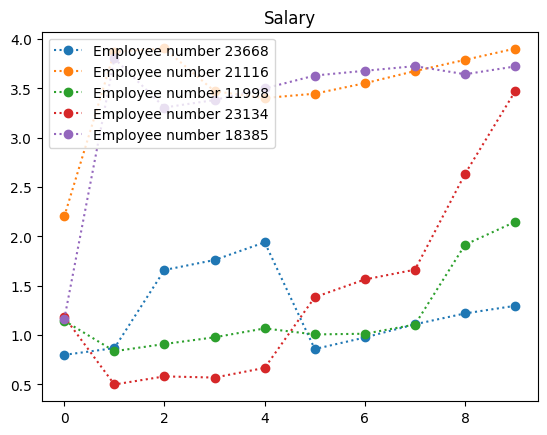

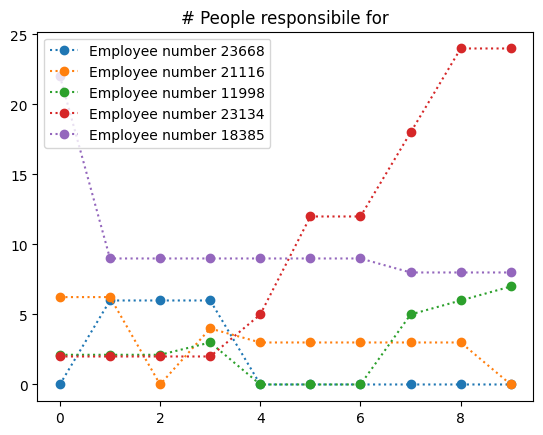

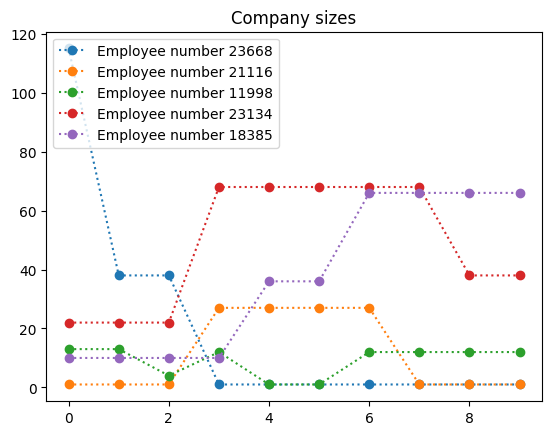

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

number_of_employees = len(X)

### Choosing random employees
##### As the employees are selected randomly, feel free to re-run this cell a few times !

number_of_randomly_selected_employees = 5

random_selection = np.random.randint(0,
                                     number_of_employees,
                                     number_of_randomly_selected_employees)


### Plotting data for the selected employees

plt.title('Salary')
for r in random_selection:
    plt.plot(X[r, :, 0],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

plt.title('# People responsibile for')
for r in random_selection:
    plt.plot(X[r, :, 1],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

plt.title('Company sizes')
for r in random_selection:
    plt.plot(X[r, :, 2],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

🕵🏻 **Data Exploration** 🕵🏻 Look at the distribution of:
* all the salaries during the 10th year, 
* people under someone's responsibility, 
* and the company sizes 

to get a better understanding of the variability of observations

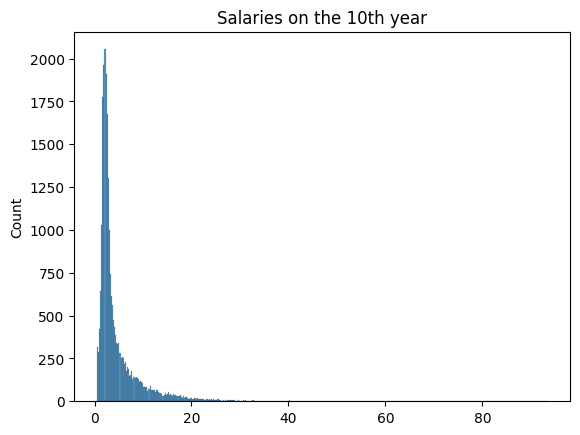

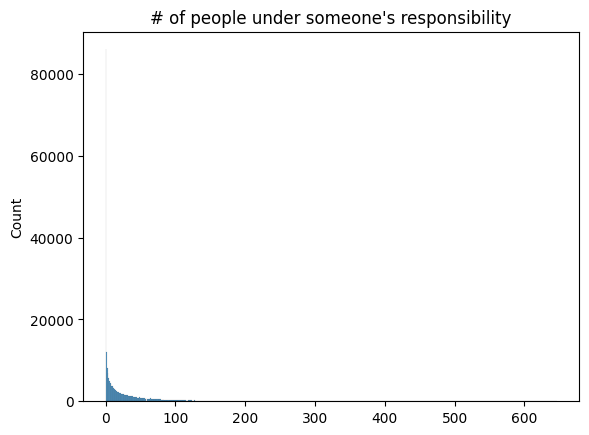

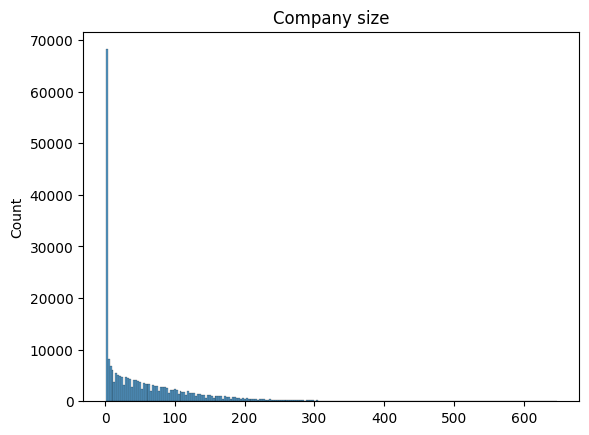

In [6]:
import seaborn as sns

plt.title("Salaries on the 10th year")
sns.histplot(X[:, -1, 0].flatten()) # all the employees, last year, feature #0 = salaries
plt.show()

plt.title("# of people under someone's responsibility")
sns.histplot(X[:, :, 1].flatten()) # all the employees, all the years, feature #1 = responsabilities
plt.show()

plt.title("Company size")
sns.histplot(X[:, :, 2].flatten()) # all the employees, all the years, feature #2 = company size
plt.show()

✂️ **Hold-out method** Let's split the dataset in a train and test set (80/20)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Notice that we are train_test_splitting the 25 000 employees!

## (2) 💻 A Simple RNN

🤗 Now that you are familiar with this company's dataset, you will create your first Recurrent Neural Network. Let's start with a simple architecture.

❓ **Question** ❓ Write a model that has: 
- a ***Normalization*** layer adapted to the training set
- a ***SimpleRNN*** layer with 20 *units* (don't forget that `tanh` is better suited as an activation function for a Recurrent Layer)
- a ***Dense*** layer with 10 neurons
- a ***Dense*** layer specific to your task (= to ***predict*** a salary)

👩🏻‍🏫 Remember: Don't forget to add a `keras.Input` before the first layer.

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, Input
from keras.layers import Dense, SimpleRNN, Flatten, Normalization

2025-05-22 12:47:32.497069: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-22 12:47:32.502945: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-22 12:47:32.513757: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747910852.534950    3994 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747910852.542282    3994 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747910852.565140    3994 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [9]:
# Define input shape
input_shape = X.shape[1:]  # (10, 3)

# Build the model
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Normalization(),  # This will be adapted to X_train later
    layers.SimpleRNN(20, activation='tanh'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)  # Predicting a single salary value
])


E0000 00:00:1747910856.082122    3994 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1747910856.082764    3994 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


❓ **Question**: How many trainable parameters does your RNN have ❓

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 10, 3)          │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 20)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 708 (2.77 KB)

 Trainable params: 701 (2.74 KB)

 Non-trainable params: 7 (32.00 B)

❓ **Question** ❓ Try to recompute the number of parameters manually.


> YOUR ANSWER HERE

<details>
    <summary><i>Answer</i></summary>


- <u> Normalization Layer</u>: 
    - This layer has $\color{red}{n_x = 3} $ features (salary, responsibility, company size) to normalize. Each of them requires to compute the <font color=blue>_mean_</font>  and the <font color=blue>_standard_deviation_</font>. So we have $\color{red}{n_x = 3} \times \color{blue}{2} = 6$ non-trainable parameters. The 7th parameter is a bias initially set to 0.

- <u> Recurrent Layer</u>: 
    - If $\color{green}{n_h = 20} $ RNN units are applied in parallel to $\color{red}{n_x = 3} $ features, then the Recurrent Layer has $\color{green}{n_h}(\color{green}{n_h} + \color{red}{n_x} + 1) = \color{green}{20} \times (\color{green}{20}+\color{red}{3}+1) = \color{green}{20} \times 24 = 480$ parameters to train.
    - Notice how this number is *independent* of the length of each sequence (here 10 days)
    
- <u> Dense Layer</u>: 
    - Starting with $\color{green}{n_h = 20} $ RNN units and $1$ bias, using 10 neurons, the Dense Layer has $ (\color{green}{20}+1) \times 10 = 21 \times 10 = 210$ parameters
    
- <u> Predictive Dense Layer</u>: 
    - Starting with $10$ neurons and $1$ bias, using 1 neuron to predict the 11th salary, the Predictive Dense Layer has $ (10+1) \times 1 = 11 \times 1 = 11$ parameters
    
</details>    

❓ **Question** ❓ Compile your model. For RNN, we recommend you to use the ***rmsprop*** optimizer (instead of *adam*).

In [11]:
from tensorflow.keras.optimizers import RMSprop

# Compile the model
model.compile(
    optimizer=RMSprop(),
    loss='mse',     # Mean Squared Error for regression
    metrics=['mae'] # Mean Absolute Error for evaluation
)


❓ **Questions** ❓ 

* Train your model on your training dataset:
    * use a Validation Split of 20%
    * and an Early Stopping Criterion with patience $= 5 $
* Evaluate your performance on the test set

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = Sequential([
    Input(shape=(10, 3)),
    Normalization(),
    SimpleRNN(20, activation='tanh'),
    Dense(10, activation='relu'),
    Dense(1)
])


# Compile model
model.compile(
    optimizer=RMSprop(),
    loss='mse',
    metrics=['mae']
)

# Set early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate on test set
loss, mae = model.evaluate(X_test, y_test)
print(f"\nTest MAE: {mae:.2f}")


Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 28.9719 - mae: 2.7677 - val_loss: 11.8113 - val_mae: 1.6095
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.6032 - mae: 1.4662 - val_loss: 6.4874 - val_mae: 1.2761
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.3822 - mae: 1.1797 - val_loss: 5.0348 - val_mae: 1.1175
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.9990 - mae: 1.1012 - val_loss: 4.1274 - val_mae: 0.9712
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.0402 - mae: 0.9928 - val_loss: 4.1807 - val_mae: 1.0309
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.4674 - mae: 0.9230 - val_loss: 3.3440 - val_mae: 0.8796
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.9955 - mae: 0.8486 - val_loss: 3.1091 - val_mae: 0.7949
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.1491 - mae: 0.8638 - val_loss: 2.9492 - val_mae: 0.7837
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4m

## (3) 💻 Baseline comparison

> ❗️ **Important reminder** ❗️ 
>  
> ***Always remember to compare your Deep Learning models, and more generally any Machine Learning model, to a baseline model.***

🧑🏻‍🏫 Remember that our goal is to predict the salary of the employees for the 11th year. It is a ***Regression task***. What baseline could we build? 
1. In the case of a traditional regression model, a baseline prediction for `y_test` is  to **predict the average of `y_train`**... but this option could be irrelevant for time-related series. Theoretically, someone's salary is supposed to increase over the years!
2. An alternative baseline prediction for a regression task is to **predict the last seen value**

❓ **Questions** ❓ 
* Compute the Mean Absolute Error of a baseline model that predicts that the salary remains constant between the 10-th and 11-th year
* Compare this baseline model to your RNN

In [13]:
# Using the last salary in X to predict the next salary
y_test_baseline = X_test[:, -1, 0] 
mae_baseline = np.mean(np.abs(y_test - y_test_baseline))  
mae_baseline

0.6120421986929893

👉 If you are stuck with this question, try `(4) LSTM` and come back to this afterwards.

🧑🏻‍🏫 Ask a TA if needed. Look at the answer only if you already tried to answer these questions unsuccessfully.

<details>
    <summary><i>Answer</i></summary>


```python
# Using the last salary in X to predict the next salary
y_test_baseline = X_test[:, -1, 0] 
mae_baseline = np.mean(np.abs(y_test - y_test_baseline))   
```
    
</details>    

😁 You should notice that your RNN performs a bit better than a baseline model.

## (4) 💻 LSTM: Long-Short Term Memory

❓ **Questions** ❓ 

* Write the exact same model, but with a `LSTM` layer instead of a `SimpleRNN` layer
* Evaluate your performance on the test set

In [15]:
from tensorflow.keras.layers import Input, Normalization, LSTM, Dense
# Build model
model = Sequential([
    Input(shape=(10, 3)),
    Normalization(),
    LSTM(20, activation='tanh'),
    Dense(10, activation='relu'),
    Dense(1)
])


# Compile model
model.compile(
    optimizer=RMSprop(),
    loss='mse',
    metrics=['mae']
)

# Set early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate on test set
loss, mae = model.evaluate(X_test, y_test)
print(f"\nTest MAE: {mae:.2f}")


Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 31.3688 - mae: 2.8165 - val_loss: 8.5701 - val_mae: 1.1162
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7.1221 - mae: 0.9787 - val_loss: 3.1853 - val_mae: 0.6451
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.8725 - mae: 0.6753 - val_loss: 2.4574 - val_mae: 0.6237
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.1708 - mae: 0.6192 - val_loss: 2.1496 - val_mae: 0.5862
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.7779 - mae: 0.5886 - val_loss: 1.8269 - val_mae: 0.5650
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.4024 - mae: 0.5524 - val_loss: 2.2833 - val_mae: 0.5944
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.4653 - mae: 0.5599 - val_loss: 2.4181 - val_mae: 0.7311
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.7708 - mae: 0.5871 - val_loss: 1.7711 - val_mae: 0.5577
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms

💪 The LSTM should perform a bit better than the SimpleRNN with a lower MAE.

🏁 Congratulations! You know how to train a RNN on sequential data.
 

💾 Do not forget to git add/commit/push your notebook...

🚀 ... and move to the next challenge!

---

<u>Note</u>: The sequences you worked with are totally fake. In case, you need to train and reproduce similar data, you can find below the functions that have been used to simulate such a dataset.

## 🛠 (Utils)

In [ ]:
def create_sequences(number):
    X, y = [], []

    for i in range(number):
        x_i, y_i = create_individual_sequence(10)
        X.append(x_i)
        y.append(y_i)

    return np.array(X), np.array(y)

def create_individual_sequence(length):
    company_sizes = []
    nb_persons = []
    salaries = []


    # Education level
    educ_level = [max(0, int(np.random.normal(10, 2)))]*length

    # Company size
    current_size = int(1 + np.random.beta(.4, 4)*500)
    for i in range(length):
        if not np.random.randint(4): # Change 1 out of 3 possibilities
            current_size = int(max(1, np.random.normal(current_size, 50)))
        company_sizes.append(current_size)

    # Number of persons
    nb_iter = np.random.beta(.15, 4)*300
    for i in range(length):
        if not np.random.randint(2): # Change 1 out of 2 possibilities
            R_1 = np.random.beta(0.5, 8)*3
            nb_iter = nb_iter + max(-2, R_1*company_sizes[i] + np.random.randint(-2, 2))
            nb_iter = max(0, nb_iter)
            nb_iter = int(min(company_sizes[i]-1, nb_iter))
        nb_persons.append(nb_iter)


    # Salary
    salary_iter = max(800, int(np.random.normal(1200, 300)+ 0.05*company_sizes[0] +  np.random.normal(40, 400)))
    salaries.append(salary_iter)
    for i in range(1, length + 1):
        R_1 = np.random.normal(100, 50)
        change_person = nb_persons[i-1] - nb_persons[i-2]
        change_company = max(0, company_sizes[i-1] - company_sizes[i-2])
        salary_iter = salary_iter + 0.05*change_company + change_person*R_1 + np.random.normal(100, 50)
        salary_iter = max(int(salary_iter), 500)

        salaries.append(salary_iter)

    y = salaries[-1]/1000
    salaries = [_/1000 for _ in salaries[:-1]]

    return np.array([salaries, nb_persons, company_sizes]).T, y

In [ ]:
#X, y = create_sequences(25000)

#np.save('X', X.astype(np.float32))
#np.save('y', y)